# Model

## Parameters:
- $D_{\tau,i,j}$: Transportation demand from node $i$ to node $j$ during time interval $\tau$.
- $d_{i,j}$: Distance between node $i$ and node $j$.
- $c_{\tau}$: Time factor at time interval $\tau$, PT time consuming divided by AEVS time consuming. Note that during busy intervals the value can be relative small due to the increased PT services.
- $q^{\text{AEVS}}$: The parameter evaluating the quality of SEAV service.
- $q^{\text{PT}}$: The parameter evaluating the quality of PT service.
- $\alpha$: The price coefficient evaluating the influence of price on customers' tendency on operator choosing.
- $\beta$: The service quality coefficient evaluating the influence of service quality on customers' tendency on operator choosing.
- $\gamma$: The distance coefficient evaluating the influence of distance on customers' tendency on operator choosing.

## Variables:
- $t^{\text{AEVS}} \in T^{\text{AEVS}}$: tax rate for AEVS operator per passenger per transportation distance.
- $t^{\text{PT}} \in T^{\text{PT}}$: tax rate for PT operator per passenger per transportation distance.
- $p^{\text{AEVS}} \in P^{\text{AEVS}}$: unit distance prices for AEVS operator per passenger.
- $p^{\text{PT}} \in P^{\text{PT}}$: ticket prices for PT operator per passenger.
- $D^{\text{AEVS}}_{\tau,i,j}$: Transportation demand achieved by AEVS operator from node $i$ to node $j$ during time interval $\tau$.
- $D^{\text{PT}}_{\tau,i,j}$: Transportation demand achieved by PT operator from node $i$ to node $j$ during time interval $\tau$.
- $W^{\text{AEVS}}_{\tau,i,j}$: Customer cost by AEVS service from node $i$ to node $j$ during time interval $\tau$.
- $W^{\text{PT}}_{\tau,i,j}$: Customer cost by PT service from node $i$ to node $j$ during time interval $\tau$.
- $U^{\text{AEVS}}_{\tau}$: Payoff function of AEVS operator during time interval $\tau$.
- $U^{\text{PT}}_{\tau}$: Payoff function of PT operator during time interval $\tau$.
- $U^{\text{tax}}_{\tau}$: Payoff function of the government from the perspective of tax revenue during time interval $\tau$.
- $U^{\text{env}}_{\tau}$: Payoff function of the government from the perspective of environment revenue during time interval $\tau$.

## Constraints:

The idea of Multinomial Logit (MNL) model is applied here to describe the customers' decision between two operators. The Multinomial Logit (MNL) model is a popular statistical model used primarily in the field of econometrics and transportation planning to predict the probability of choices among discrete alternatives. It belongs to a broader class of logistic regression models and is particularly useful when decision-makers are faced with multiple choices, such as transportation modes, product selections, or any scenario where choices are mutually exclusive.

First, a utility function is applied to show how the variables affect the dicision of customers. A linear utility function is normally defined as followed:

$$ f = \alpha X_1 + \beta X_2 + \gamma X_3 + \epsilon $$

Where:
- $ X_1, X_2, X_3 $ are the explanatory variables which might include factors such as cost, time, accessibility, and other relevant attributes.
- $ \alpha, \beta, \gamma $ are the coefficients to be estimated.
- $ \epsilon $ is the error terms, assumed to follow an independent and identically distributed Gumbel distribution.

Then suppose that a decision-maker has a choice among $J$ alternatives. The probability that alternative $j$ is chosen can be given by:

$$P_{j} = \frac{\exp(f_j)}{\sum_{k=1}^{J} \exp(f_k)}$$

Moreover, note that error terms $\epsilon$ are assumed to follow independent and identically distributed Gumbel distribution. The use of the Gumbel distribution leads directly to the logistic formula for choice probabilities. This property simplifies the computation and allows for efficient estimation techniques.

In this game, the utility functions for AEVS and PT are defined as followed:

$$ f^{\text{AEVS}}_{\tau,i,j} = -\alpha p^{\text{AEVS}} d_{i,j} + \beta q^{\text{AEVS}} + \gamma \log{d_{i,j}} + \epsilon^{SAEV} $$

$$ f^{\text{PT}}_{\tau,i,j} = -\alpha p^{\text{PT}} + \beta q^{\text{PT}} + \epsilon^{PT} $$

For AEVS operator, three variables can affect the customers' tendency on operator choosing: travel cost, service quality and distance. For the travel cost and service quality, the coefficient is directly multiplied to the variable, while for the distance, a logarithmic transformation is applied to the distance. In economic terms, the logarithmic function could reflect decreasing marginal utility of travel with respect to distance. As people travel farther, each additional unit of distance provides a smaller increase in utility compared to the previous unit. This is aligned with the broader economic concept of diminishing returns. Moreover, compared to $f^{\text{PT}}_{\tau,i,j}$, there is no distance factor in $f^{\text{PT}}_{\tau,i,j}$. Distance might have a more pronounced effect on the choice to use SAEV compared to PT. For instance, SAEVs might be preferred for shorter or very long distances due to convenience and cost-effectiveness at those ranges, while PT might be more consistently chosen for mid-range distances without as direct a sensitivity to slight changes in distance.

The probability of choosing AEVS service and PT service are assumed to be:

$$ Prob^{\text{AEVS}}_{\tau,i,j} = \frac{\exp(f^{\text{AEVS}}_{\tau,i,j})}{\exp(f^{\text{AEVS}}_{\tau,i,j}) + \exp(f^{\text{PT}}_{\tau,i,j})} $$

$$ Prob^{\text{PT}}_{\tau,i,j} = \frac{\exp(f^{\text{PT}}_{\tau,i,j})}{\exp(f^{\text{AEVS}}_{\tau,i,j}) + \exp(f^{\text{PT}}_{\tau,i,j})} $$

Therefore, the distribution of total traffic demand on the two operators can be expressed by:

$$ D^{\text{AEVS}}_{\tau,i,j} = Prob^{\text{AEVS}}_{\tau,i,j} D_{\tau,i,j} $$

$$ D^{\text{PT}}_{\tau,i,j} = Prob^{\text{PT}}_{\tau,i,j} D_{\tau,i,j} $$

## Players:

- Government: Decides on the tax levels for Autonomous Alectric Vehicle Systems(AEVS) operator and Public Transportation(PT) operator.

- AEVS operator: Decides on the per-unit distance price.

- PT operator: Decides on the ticket price, irrespective of the distance.

## Strategies:

- Government:
  - $T^{\text{AEVS}}$: The set of tax rate for AEVS operator per passenger per transportation distance. $T^{\text{AEVS}} = \{0.05, 0.1, 0.15, 0.2\}$.
  - $T^{\text{PT}}$: The set of tax rate for PT operator per passenger per transportation distance. $T^{\text{PT}} = \{0.01, 0.02, 0.03, 0.04\}$.

- AEVS operator: Decides on the base price and per-unit distance price.
  - $P^{\text{AEVS}}$: The set of unit distance prices for AEVS operator per passenger. $P^{\text{AEVS}} = \{0, 0.5, 1, 1.5, 2\}$.

- PT operator: Decides on the ticket price, irrespective of the distance.
  - $P^{\text{PT}}$: The set of ticket prices for PT operator per passenger. $P^{\text{PT}} = \{0, 1, 2, 3, 4\}$.

## Payoffs:

- Government:
  - Tax Revenue: 
  - Environment Revenue:

- AEVS operator: $U^{\text{AEVS}}_{\tau} = \sum_{i}\sum_{j} (p^{\text{AEVS}} - t^{\text{AEVS}}) \cdot d_{i,j} \cdot D^{\text{AEVS}}_{\tau,i,j}$, $\forall \tau$.

- PT operator: $U^{\text{PT}}_{\tau} = \sum_{i}\sum_{j} (p^{\text{PT}} - t^{\text{PT}} \cdot d_{i,j}) \cdot D^{\text{PT}}_{\tau,i,j}$, $\forall \tau$.

In [268]:
# Import Libraries
import numpy as np
import pandas as pd
import nashpy as nash
import random

In [269]:
# Parameters for the game
TIME_INTERVALS = 48  # Number of time intervals
NODES = 25  # Number of nodes
# time factor c
# c = np.array([2,2,1.75,1.75,1.5,1.5,1.25,1.25,1,1,1.25,1.25,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.25,1.25,1.25,1.25,1,1,1.25,1.25,1.25,1.25,1.75,1.75,1.75,1.75,2,2,2,2,2,2,2,2,2,2])

In [270]:
# Load the demand data D from Excel file
file_path = 'all_traveling_orders.xlsx'  # Replace with the actual path
xl = pd.ExcelFile(file_path)

# Initialize a three-dimensional NumPy array to store the demand data
D = np.empty((len(xl.sheet_names), NODES, NODES))

# Read demand data for all time intervals
for i, sheet in enumerate(xl.sheet_names):
    D[i] = xl.parse(sheet, header=None).values

In [271]:
# Load the distance data d from Excel file
file_path = 'distance.xlsx'  # Replace with the actual path
xl = pd.read_excel(file_path, header=None)

# Transform into Numpy array
d = xl.values

In [272]:
# Sequential game between government and operators
t_AEVS = 0.1
t_PT = 0

In [273]:
P_unit = np.linspace(0, 2, 5)
print(P_unit)
P_ticket = np.linspace(0, 4, 5)
print(P_ticket)

[0.  0.5 1.  1.5 2. ]
[0. 1. 2. 3. 4.]


In [274]:
alpha = 0.5  # price elasticity coefficient
beta = 0.3   # quality factor coefficient
gamma = 0.2  # distance effect coefficient

Q_SAEV = 5    # quality and convenience factor for SAEV
Q_PT = 3      # quality and convenience factor for PT

np.random.seed(42)
epsilon_SAEV = np.random.gumbel(loc=0, scale=1, size=1)
epsilon_PT = np.random.gumbel(loc=0, scale=1, size=1)

# epsilon_SAEV = 0
# epsilon_PT = 0

def D_AEVS(t, i, j, p_unit, p_ticket):
    exp_SAEV = np.exp(beta * Q_SAEV - alpha * p_unit * d[i, j] + gamma * np.log(d[i, j]) + epsilon_SAEV)
    exp_PT = np.exp(beta * Q_PT - alpha * p_ticket)
    return ((exp_SAEV / (exp_SAEV + exp_PT)))*D[t,i,j]

def D_PT(t, i, j, p_unit, p_ticket):
    exp_SAEV = np.exp(beta * Q_SAEV - alpha * p_unit * d[i, j] + gamma * np.log(d[i, j]) + epsilon_SAEV)
    exp_PT = np.exp(beta * Q_PT - alpha * p_ticket)
    return ((exp_PT / (exp_SAEV + exp_PT)))*D[t,i,j]

In [275]:
def U_AEVS(t, p_unit, p_ticket):
    U = 0
    for i in range(NODES):
        for j in range(NODES):
            if j != i:
                U = U + (p_unit-t_AEVS)*d[i,j]*D_AEVS(t,i,j,p_unit,p_ticket)
    return U

def U_PT(t, p_unit, p_ticket):
    U = 0
    for i in range(NODES):
        for j in range(NODES):
            if j != i:
                U = U + (p_ticket-t_PT*d[i,j])*D_PT(t,i,j,p_unit,p_ticket)
    return U

In [276]:
t = 0
U1 = np.zeros((5, 5))
U2 = np.zeros((5, 5))

for a, p_unit in enumerate(P_unit):
    for b, p_ticket in enumerate(P_ticket):
        U1[a,b] = U_AEVS(t, p_unit, p_ticket)
        U2[a,b] = U_PT(t, p_unit, p_ticket)

game = nash.Game(U1,U2)
eqs = game.support_enumeration()

print("Nash Equilibrium(s):")
for eq in eqs:
    print(eq)


Nash Equilibrium(s):
(array([ 0.,  1.,  0., -0.,  0.]), array([0., 0., 0., 1., 0.]))


/tmp/ipykernel_104855/4035318179.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U1[a,b] = U_AEVS(t, p_unit, p_ticket)
/tmp/ipykernel_104855/4035318179.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U2[a,b] = U_PT(t, p_unit, p_ticket)


In [277]:
U1

array([[-36.80199062, -38.9484328 , -40.37759534, -41.29704409,
        -41.87554976],
       [ 55.97667653,  72.74528978,  90.21745398, 107.17479627,
        122.53950943],
       [ 33.00095746,  47.90805569,  66.78196254,  89.1306054 ,
        113.93405133],
       [ 14.13234762,  21.79725307,  32.7167094 ,  47.56195238,
         66.75224709],
       [  5.64516701,   8.99418813,  14.07852591,  21.52102905,
         31.96258714]])

In [278]:
U2

array([[  0.        ,   4.37351505,   5.50827534,   5.1304811 ,
          4.209743  ],
       [  0.        ,  23.02550307,  36.35270044,  41.3676475 ,
         40.29037612],
       [  0.        ,  38.14782434,  69.89036252,  93.99207166,
        110.14783333],
       [  0.        ,  44.02074981,  85.20038846, 122.20592035,
        153.68365318],
       [  0.        ,  46.00152916,  90.89804139, 133.96828296,
        174.30011611]])

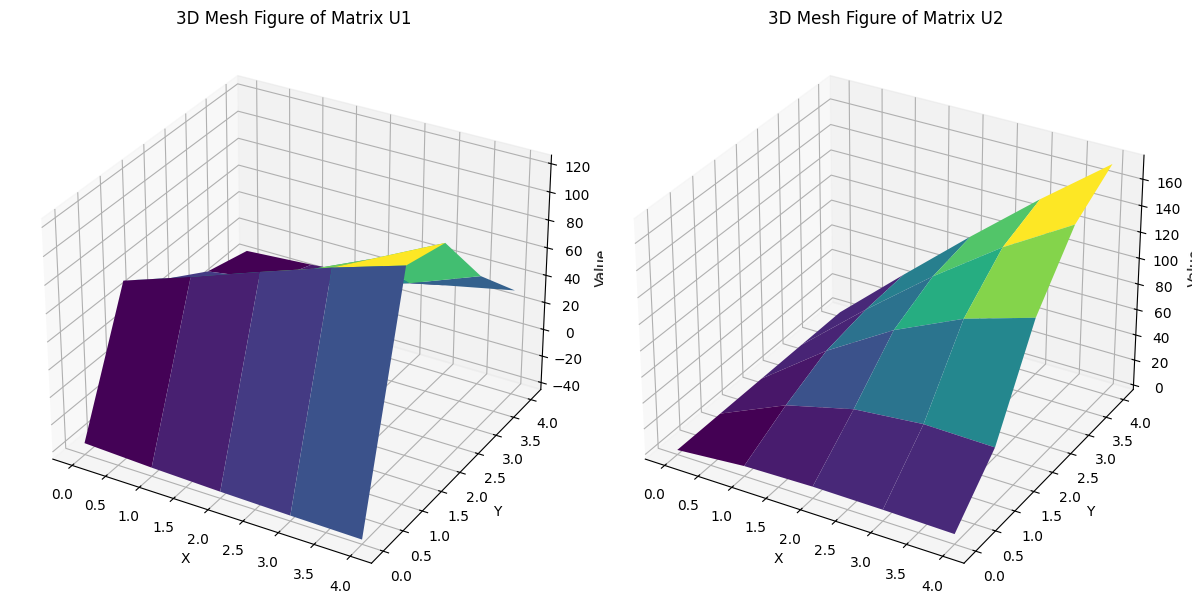

In [279]:
import matplotlib.pyplot as plt

# Example matrices
matrix1 = U1
matrix2 = U2

# Create meshgrids for x and y coordinates
x, y = np.meshgrid(np.arange(matrix1.shape[1]), np.arange(matrix1.shape[0]))

# Flatten the matrices for z coordinates
z1 = matrix1.flatten()
z2 = matrix2.flatten()

# Create two separate 3D plots
fig = plt.figure(figsize=(12, 6))

# Plot for U1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, matrix1, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Value')
ax1.set_title('3D Mesh Figure of Matrix U1')

# Plot for U2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, matrix2, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Value')
ax2.set_title('3D Mesh Figure of Matrix U2')

# Show the plots
plt.tight_layout()
plt.show()


Nash Equilibrium double check using matrix method.

In [280]:
import numpy as np

def find_nash_equilibria(U1, U2):
    m, n = U1.shape  # Number of strategies for Players 1 and 2 respectively
    equilibria = []

    for i in range(m):  # Iterate over Player 1's strategies
        for j in range(n):  # Iterate over Player 2's strategies
            # Check if i is a best response for Player 1
            best_response_p1 = U1[i, j] == np.max(U1[:, j])
            # Check if j is a best response for Player 2
            best_response_p2 = U2[i, j] == np.max(U2[i, :])

            if best_response_p1 and best_response_p2:
                equilibria.append((i, j))

    return equilibria

equilibria = find_nash_equilibria(U1, U2)
print("Nash Equilibria:", equilibria)


Nash Equilibria: [(1, 3)]
